__In this analysis we have dataset of parkings in different states of USA, with analysing this data we are going to capture a lot of insights for making a data driven decisions and answer different business problems.__

In [1]:
# Import Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import jovian

### 1. Reading and Understanding the Data.

In [3]:
# Importing Dataset

parking = pd.read_csv('parking.xls - data_gov_bldg_rexus.csv')
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [4]:
# Getting a random overview of data

parking.sample(10)

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
3572,TAMPA,FL,ACTIVE,BUILDING,13,LEASED
824,SEATAC,WA,ACTIVE,BUILDING,304,LEASED
1264,WASHINGTON,DC,ACTIVE,BUILDING,0,OWNED
645,AUBURN,WA,ACTIVE,BUILDING,1,OWNED
370,ALBURG,VT,ACTIVE,BUILDING,0,OWNED
3555,TAMPA,FL,ACTIVE,STRUCTURE,33,LEASED
1827,PARSIPPANY,NJ,ACTIVE,BUILDING,27,LEASED
4024,PHILADELPHIA,MS,ACTIVE,BUILDING,28,LEASED
5992,FAYETTEVILLE,AR,ACTIVE,BUILDING,38,LEASED
5906,NORTH PLATTE,NE,ACTIVE,BUILDING,59,OWNED


In [5]:
# Understanding Table

parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bldg City             9060 non-null   object
 1   Bldg State            9060 non-null   object
 2   Bldg Status           9060 non-null   object
 3   Property Type         9060 non-null   object
 4   Total Parking Spaces  9060 non-null   int64 
 5   Owned/Leased          9060 non-null   object
dtypes: int64(1), object(5)
memory usage: 424.8+ KB


In [6]:
# Getting Unique Count for Building Status

parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [7]:
# Getting Unique Count for Property Type

parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [8]:
# Checking Data

parking.shape

(9060, 6)

### 2. Data Visualisation and Business Problems 

#### `Que:1 - What is the Distribution or Values for owned/leased parking type ?`

In [9]:
# Pivot Table for Distribution of parking type

owned_leased = pd.pivot_table(parking, index = 'Owned/Leased', values = 'Total Parking Spaces', aggfunc = 'count')
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


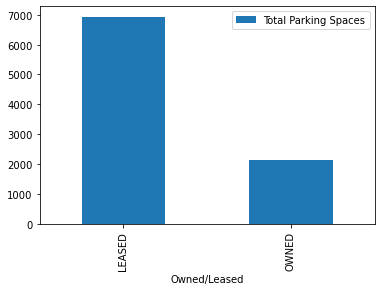

In [10]:
# Graphical Representation of Distribution

owned_leased.plot(kind ='bar')
plt.show()

#### `Que:2 - Which Building State Parking Situation has maximum excess ?`

In [11]:
# Review Dataset



parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [12]:
# Creating Cross Chart for excess parking

excess_parking = pd.pivot_table(parking, index='Bldg State', columns='Bldg Status', values='Total Parking Spaces')
excess_parking = excess_parking[excess_parking.EXCESS > 0]
excess_parking = excess_parking.sort_values('EXCESS',ascending=False)
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
MO,121.200000,815.333333,254.272727
NV,48.648649,NaN,173.000000
LA,43.684932,NaN,68.666667
AL,62.357724,NaN,59.000000
MD,104.185090,0.000000,43.166667
CO,78.936709,NaN,22.200000
WI,23.247934,NaN,22.000000
IL,45.000000,NaN,21.000000
NE,54.060000,NaN,19.000000


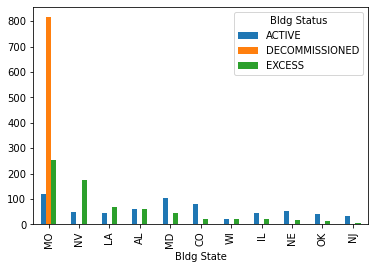

In [13]:
# Graphical Representation for all parking Situation in each state

excess_parking.plot(kind='bar');

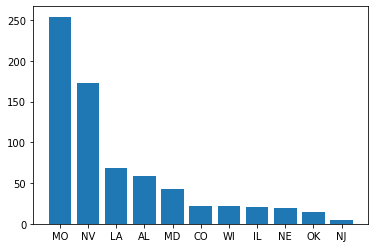

In [14]:
# Graphical Representation for Excess Parking type 

plt.bar(excess_parking.index,excess_parking.EXCESS);

#### `Que:3 - Which Building City has Maximum number of Decommisioned status ?`

In [15]:
# Buidling cities for decommissioned status

decom_parking_city = parking[parking['Bldg Status'] == 'DECOMMISSIONED']
decom_parking_city = decom_parking_city[decom_parking_city['Total Parking Spaces'] > 0]
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


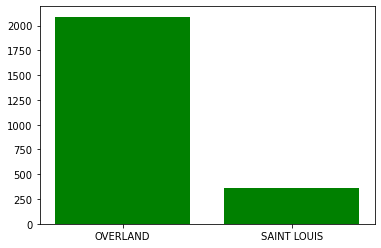

In [16]:
# Graphical Representation of Decommisioned Parking Status

plt.bar(decom_parking_city['Bldg City'],decom_parking_city['Total Parking Spaces'],color='green')
plt.show()

#### `Que:4 - Which Property Type Has Excess in Parking ?`

In [17]:
# Reviewing Dataset

parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [18]:
# Creating cross chart

excess_parking_property = pd.pivot_table(parking[parking['Bldg Status']=='EXCESS'], index='Property Type', values='Total Parking Spaces')
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


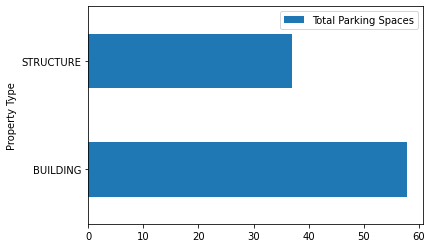

In [19]:
# Graphical Representation for excess parking property type

excess_parking_property.plot(kind='barh');

#### `Que:5 - Where is most number of active parking on the basis of owned/leased ?`

In [20]:
# Cross Chart on the basis of owned/leased

active_parking = pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'], index='Owned/Leased', values='Total Parking Spaces')
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [21]:
# Cross chart on the basis of percentage

active_parking['Per%'] = active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()
active_parking

,Total Parking Spaces,Per%
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


#### `Que:6 - Which state has most number of leased type parking ?`

In [22]:
# Cross Chart for State leased Parking

state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased']=='LEASED'], index='Bldg State', values='Total Parking Spaces',aggfunc='sum')
state_leased_parking = state_leased_parking.sort_values('Total Parking Spaces',ascending=False)
state_leased_parking = state_leased_parking[0:5]
state_leased_parking

,Total Parking Spaces
Bldg State,
TX,36802
CA,28257
VA,27541
FL,19101
MO,16811


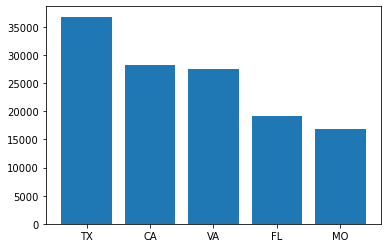

In [23]:
# Graphical Representation for State wise Leased Parking

plt.bar(state_leased_parking.index, state_leased_parking['Total Parking Spaces']);

#### `Que:7 - Which Property Type has more number of average active parking status?`

In [24]:
# Reviewing Data Set

parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [25]:
# Cross Chart

active_parking_property = pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'],index='Property Type', values='Total Parking Spaces').sort_values('Total Parking Spaces',ascending=False)
active_parking_property 

,Total Parking Spaces
Property Type,
STRUCTURE,70.779762
BUILDING,51.134764
LAND,19.268908


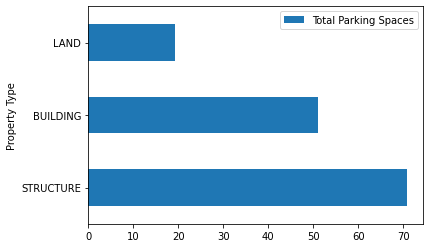

In [26]:
# Graphical Representation for active status parking on the basis of building type

active_parking_property.plot(kind='barh');

#### `Que:8 - What is the distribution of parking in city by property type ?`

In [27]:
# Cross Chart on Parking distribution in city on the basis of property type.

city_property_type = pd.pivot_table(parking, index='Bldg City', columns='Property Type', values='Total Parking Spaces',aggfunc='sum')
city_property_type = city_property_type[(city_property_type['BUILDING']>0) & (city_property_type['STRUCTURE']>0) & (city_property_type['LAND']>0)]
city_property_type

Property Type,BUILDING,LAND,STRUCTURE
Bldg City,,,
DENVER,1390.0,124.0,67.0
DETROIT,1883.0,244.0,1639.0
FORT SNELLING,1087.0,80.0,175.0
HOUSTON,5066.0,10.0,782.0
WASHINGTON,17707.0,1094.0,1269.0
WILMINGTON,814.0,23.0,7.0


NOTE: Due to insufficient business recommendation we are just filtering the null values for getting insights.

#### `Que:9 - Which are the building states those have 0 parkings ?`

In [28]:
# Zero Parkings

no_parking_building = parking[parking['Total Parking Spaces']==0]
no_parking_building = no_parking_building.groupby('Bldg State')[['Total Parking Spaces']].count()
no_parking_building = no_parking_building.sort_values('Total Parking Spaces',ascending=False)
no_parking_building

,Total Parking Spaces
Bldg State,
TX,404
DC,349
MD,222
VA,180
NY,150
CA,121
PA,111
WA,71
AZ,68


#### `Que:10 - What are those states which has maximum and minimum parking spaces ?`

In [29]:
# Max Min Parking State wise

max_min_parking = parking.groupby('Bldg State')[['Total Parking Spaces']].count()
max_min_parking = max_min_parking.sort_values('Total Parking Spaces', ascending=False)
max_min_parking

,Total Parking Spaces
Bldg State,
TX,886
CA,746
DC,486
VA,440
FL,413
MD,403
NY,367
PA,245
CO,242


In [30]:
# Min and Max Parking State Wise

print('Max number of parking in state :', max_min_parking.head(1))
print('Min number of parking in state :', max_min_parking.tail(1))

Max number of parking in state :             Total Parking Spaces
Bldg State                      
TX                           886
Min number of parking in state :             Total Parking Spaces
Bldg State                      
RI                            27


In [31]:
jovian.commit(project_name='Parking Analysis USA', Environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zubairsheikh9/parking-data-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/zubairsheikh9/parking-data-analysis


'https://jovian.ai/zubairsheikh9/parking-data-analysis'